### Introducción del dataset

La base de datos utilizada para este análisis corresponde a una empresa minorista y contiene información detallada sobre pedidos realizados entre los años 2018 y 2021. El conjunto de datos fue filtrado para centrarse exclusivamente en pedidos realizados en **Colombia**, con el fin de brindar un análisis más contextualizado y relevante para el entorno local.

Cada registro representa una transacción o línea de pedido, incluyendo datos sobre el producto vendido, el cliente que realizó la compra, las fechas del pedido y del envío, el método de entrega, la ubicación geográfica, el segmento del cliente, así como los valores asociados a ventas, ganancias y descuentos. Esta información permite realizar análisis tanto comerciales como logísticos, con énfasis en patrones de consumo, rentabilidad y comportamiento por zonas.

---

### Diccionario de datos (resumen)

El diccionario de datos entregado junto al dataset proporciona claridad sobre la estructura y significado de cada columna. A continuación, se resumen algunos campos clave:

Este diccionario facilitó la comprensión de los datos y permitió construir visualizaciones precisas y análisis confiables.





In [1]:
#Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Excel con los datos
archivo_datos = "/content/drive/MyDrive/retail_limpio.xlsx"
df = pd.read_excel(archivo_datos)

# Visualizar las primeras filas y columnas disponibles
df_head = df.head()
columnas = df.columns.tolist()

# Mostrar los nombres exactos de las columnas del DataFrame
print(df.columns)

# Filtrar por Colombia usando el nombre correcto de la columna
df_colombia = df[df["País/Región"] == "Colombia"]

# Número de registros para Colombia
num_registros_colombia = df_colombia.shape[0]
print(num_registros_colombia)

# Primeras filas del DataFrame filtrado
df_colombia_head = df_colombia.head()
print(df_colombia.head())# primeras filas SOLO de Colombia
df.head() # primeras filas de TODO el dataset

Index(['Categoría', 'Ciudad', 'Fabricante', 'Fecha de envío',
       'Fecha del pedido', 'Ganancia (agrupación)', 'Id. del pedido',
       'Método de envío', 'Nombre del cliente', 'Nombre del producto',
       'País/Región', 'Provincia/Estado/Departamento', 'Región', 'Segmento',
       'Subcategoría', 'Cantidad', 'Descuento', 'Ganancia', 'Ventas',
       'año_pedido', 'mes_pedido'],
      dtype='object')
360
               Categoría    Ciudad Fabricante Fecha de envío Fecha del pedido  \
106  Material de oficina  Medellín      Accos     2021-05-10       2021-05-06   
107           Mobiliario     Bello     Sauder     2020-07-30       2020-07-24   
108           Mobiliario     Bello  Deflect-O     2020-07-30       2020-07-24   
109           Mobiliario  Apartadó      Tenex     2020-07-03       2020-06-29   
110  Material de oficina  Apartadó    Sanford     2020-07-03       2020-06-29   

     Ganancia (agrupación)  Id. del pedido Método de envío Nombre del cliente  \
106                 

,Categoría,Ciudad,Fabricante,Fecha de envío,Fecha del pedido,Ganancia (agrupación),Id. del pedido,Método de envío,Nombre del cliente,Nombre del producto,...,Provincia/Estado/Departamento,Región,Segmento,Subcategoría,Cantidad,Descuento,Ganancia,Ventas,año_pedido,mes_pedido
0,Material de oficina,Cruzeiro do Sul,Boston,2021-04-06,2021-04-02,200.0,MX-2021-111899,Estándar,Araceli Manzanares,"Boston Rotuladores, Tamaños variados",...,Acre,Sur,Empresa,Arte,3,0.0,206.0,591.0,2021,4
1,Mobiliario,Rio Branco,Dania,2021-10-11,2021-10-08,800.0,MX-2021-113922,Rápido,Benjamín Saavedra,"Dania Conjunto de estantes, Metal",...,Acre,Sur,Cliente,Librerías,2,0.0,923.0,2251.0,2021,10
2,Material de oficina,Rio Branco,Avery,2021-10-11,2021-10-08,0.0,MX-2021-113922,Rápido,Benjamín Saavedra,"Avery Anillas, Transparente",...,Acre,Sur,Cliente,Carpetas,5,0.0,11.0,129.0,2021,10
3,Mobiliario,Rio Branco,Tenex,2019-06-18,2019-06-14,0.0,MX-2019-163888,Estándar,Alejandro Trejo,"Tenex Bandeja apiladora, Negro",...,Acre,Sur,Cliente,Mobiliario,3,0.0,95.0,505.0,2019,6
4,Mobiliario,Rio Branco,Safco,2019-06-18,2019-06-14,600.0,MX-2019-163888,Estándar,Alejandro Trejo,"Safco Vitrina, Convencional",...,Acre,Sur,Cliente,Librerías,3,0.0,641.0,3377.0,2019,6


In [2]:
# Cargar el archivo Excel con los datos
diccionario_datos = "/content/drive/MyDrive/Diccionario de datos retail.xlsx"
df_dic = pd.read_excel(diccionario_datos)
df_dic.head()


,Nombre de la Columna,Descripción,Tipo de Dato,Ejemplos
0,Categoría,Tipo general de productos.,Cadena de texto,"Material de oficina, Mobiliario"
1,Ciudad,Ciudad desde la cual se realiza el pedido.,Cadena de texto,"Cruzeiro do Sul, Rio Branco, Penedo"
2,Fabricante,Empresa que produce el producto.,Cadena de texto,"Boston, Dania, Avery, Tenex, Safco, Fellowes"
3,Fecha de envío,Fecha en que el pedido fue enviado.,Fecha,"2021-04-06, 2019-06-18"
4,Fecha del pedido,Fecha en que se realizó el pedido.,Fecha,"2021-04-02, 2019-06-14"


In [3]:
# Tipos de datos de cada columna
df_colombia.info()



<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 106 to 9902
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Categoría                      360 non-null    object        
 1   Ciudad                         360 non-null    object        
 2   Fabricante                     360 non-null    object        
 3   Fecha de envío                 360 non-null    datetime64[ns]
 4   Fecha del pedido               360 non-null    datetime64[ns]
 5   Ganancia (agrupación)          360 non-null    float64       
 6   Id. del pedido                 360 non-null    object        
 7   Método de envío                360 non-null    object        
 8   Nombre del cliente             360 non-null    object        
 9   Nombre del producto            360 non-null    object        
 10  País/Región                    360 non-null    object        
 11  Provincia/Estado/Depa

### Paso 1. Exploración inicial de los datos

Antes de empezar a graficar, hicimos una revisión rápida del conjunto de datos filtrado únicamente para Colombia.

**1. Tipo de información que contiene:**  
Los datos incluyen información de varios tipos: textos como la categoría del producto o la ciudad desde donde se hace el pedido, números como las ventas y ganancias, y fechas como el día en que se hizo y se envió cada pedido. También trae columnas que ya vienen calculadas, como el año y el mes del pedido.

El conjunto contiene tanto variables categóricas como numéricas y temporales:

Categóricas: Categoría, Ciudad, Método de envío, Segmento, Subcategoría, etc.

Numéricas: Ganancia, Ventas, Cantidad, Descuento, etc.

Fechas: Fecha del pedido, Fecha de envío.

Derivadas: año_pedido, mes_pedido.

**2. Estado general del archivo:**  
Es un archivo que ya está bastante limpio y procesado. No hay valores vacíos, las columnas están completas y organizadas, y algunas variables como las ganancias ya están agrupadas o calculadas. Esto nos permite comenzar el análisis sin tener que hacer una limpieza previa.

**3. ¿Qué tan claro es el diccionario de datos?:**  
El diccionario que acompaña el archivo es claro y fácil de entender. Explica qué significa cada columna, qué tipo de datos tiene (texto, número o fecha) y da ejemplos que ayudan a ubicarse. Esto facilita mucho el trabajo, ya que evita confusiones y nos permite interpretar correctamente la información desde el principio.


In [4]:
df_colombia.head()         # Muestra las primeras filas
df_colombia.describe()     # Estadísticas generales para columnas numéricas



,Fecha de envío,Fecha del pedido,Ganancia (agrupación),Cantidad,Descuento,Ganancia,Ventas,año_pedido,mes_pedido
count,360,360,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,2020-06-14 12:52:00,2020-06-10 06:32:00,438.333333,3.547222,0.002222,522.191667,2263.969444,2019.847222,7.663889
min,2018-01-26 00:00:00,2018-01-22 00:00:00,-2200.000000,1.000000,0.000000,-2031.000000,32.000000,2018.000000,1.000000
25%,2019-10-08 00:00:00,2019-10-04 00:00:00,0.000000,2.000000,0.000000,70.500000,404.000000,2019.000000,5.000000
50%,2020-07-29 00:00:00,2020-07-22 12:00:00,200.000000,3.000000,0.000000,202.500000,946.000000,2020.000000,8.000000
75%,2021-05-22 00:00:00,2021-05-19 00:00:00,400.000000,5.000000,0.000000,574.000000,2565.750000,2021.000000,10.000000
max,2021-12-31 00:00:00,2021-12-27 00:00:00,9000.000000,14.000000,0.200000,9148.000000,31721.000000,2021.000000,12.000000
std,NaN,NaN,1058.393959,2.007782,0.020994,1065.041514,3648.746875,1.051060,3.137663


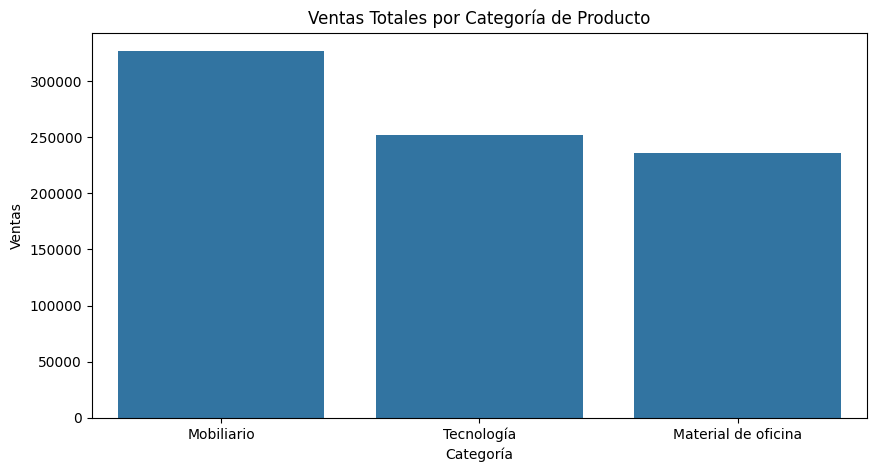

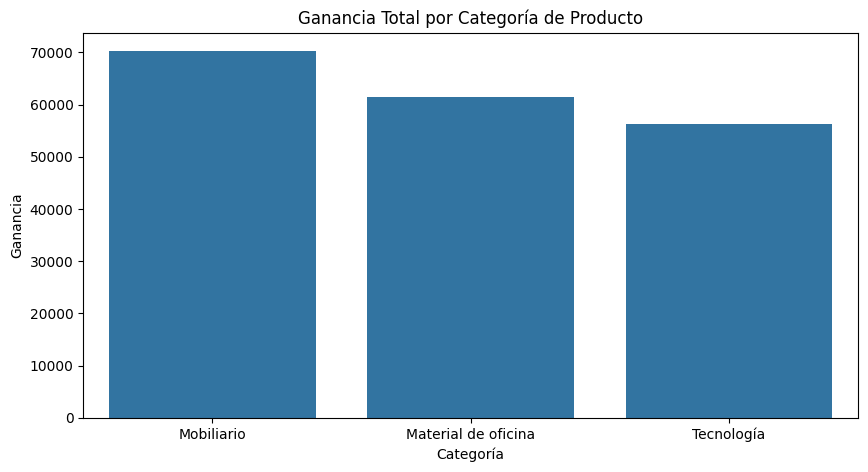

In [5]:


# Agrupación por categoría
ventas_categoria = df_colombia.groupby('Categoría')['Ventas'].sum().sort_values(ascending=False)
ganancia_categoria = df_colombia.groupby('Categoría')['Ganancia'].sum().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10,5))
sns.barplot(x=ventas_categoria.index, y=ventas_categoria.values)
plt.title('Ventas Totales por Categoría de Producto')
plt.ylabel('Ventas')
plt.xlabel('Categoría')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=ganancia_categoria.index, y=ganancia_categoria.values)
plt.title('Ganancia Total por Categoría de Producto')
plt.ylabel('Ganancia')
plt.xlabel('Categoría')
plt.show()


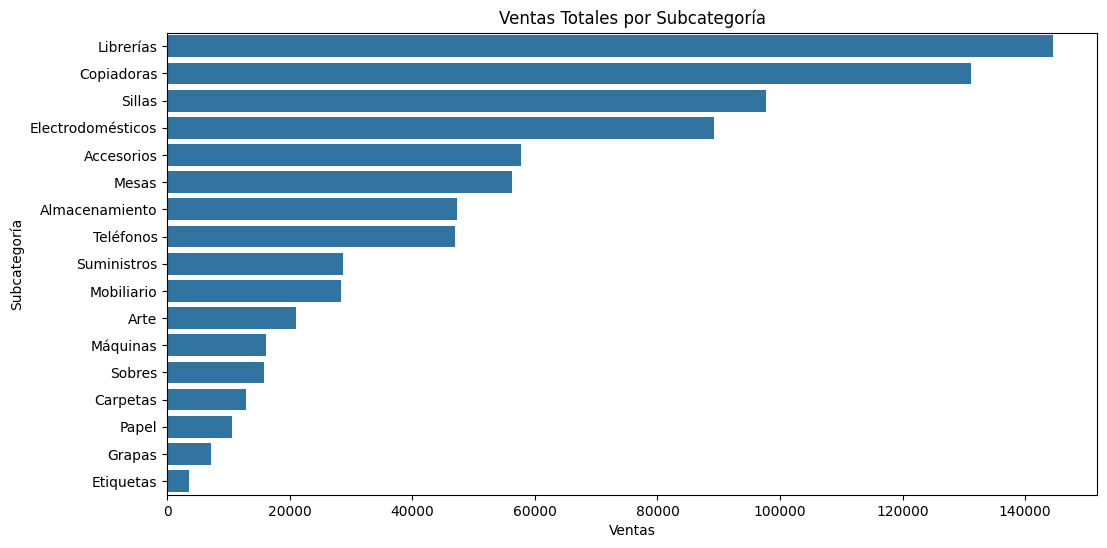

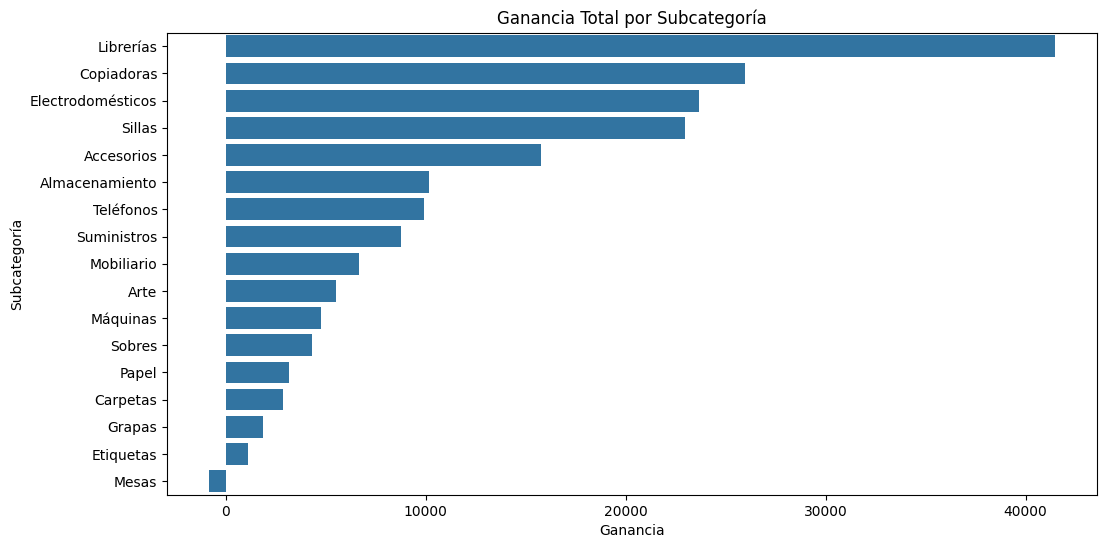

In [6]:
# Agrupación por subcategoría
ventas_subcategoria = df_colombia.groupby('Subcategoría')['Ventas'].sum().sort_values(ascending=False)
ganancia_subcategoria = df_colombia.groupby('Subcategoría')['Ganancia'].sum().sort_values(ascending=False)

# Visualización de subcategorías
plt.figure(figsize=(12,6))
sns.barplot(x=ventas_subcategoria.values, y=ventas_subcategoria.index)
plt.title('Ventas Totales por Subcategoría')
plt.xlabel('Ventas')
plt.ylabel('Subcategoría')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=ganancia_subcategoria.values, y=ganancia_subcategoria.index)
plt.title('Ganancia Total por Subcategoría')
plt.xlabel('Ganancia')
plt.ylabel('Subcategoría')
plt.show()


### Análisis por Categoría y Subcategoría

#### Ventas totales por categoría

El gráfico muestra que la **categoría "Mobiliario"** es la que más ventas genera, seguida por **Tecnología** y luego **Material de oficina**. Esto sugiere que los productos relacionados con mobiliario (como sillas, mesas, estantes, etc.) tienen mayor demanda o representan un mayor valor unitario por venta.

#### Ganancia total por categoría

El patrón de ganancias coincide con el de ventas: **Mobiliario** también lidera en ganancia total. Esto indica que además de vender más, los productos de esta categoría pueden tener márgenes de ganancia favorables.

---

#### Ventas totales por subcategoría

La subcategoría que más ventas registra es **"Librerías"**, seguida por **"Copiadoras"** y **"Sillas"**. Este resultado refuerza la importancia del mobiliario en las ventas, ya que muchas de las subcategorías en el top pertenecen a esa categoría general.

#### Ganancia total por subcategoría

En cuanto a ganancias, **"Librerías"** también se ubica como la subcategoría con mayor ganancia, lo cual la convierte en un producto clave. Sin embargo, se observan diferencias interesantes: algunas subcategorías como **"Mesas"** tienen ventas considerables pero generan poca o ninguna ganancia, lo que podría reflejar costos elevados o precios poco rentables.

---

#### Conclusión

> Los productos de la categoría **Mobiliario** son los más relevantes tanto en ventas como en ganancias. Dentro de esta, **Librerías** se destaca como una subcategoría clave para el negocio. Esta información sugiere que el departamento de marketing debería seguir potenciando estas líneas de producto, pero también revisar otras subcategorías con bajo margen para evaluar oportunidades de mejora en rentabilidad.


In [7]:
#la columna Fecha del pedido la convertimos  a datetime:
df_colombia['Fecha del pedido'] = pd.to_datetime(df_colombia['Fecha del pedido'])


<ipython-input-7-a62a38e2008a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombia['Fecha del pedido'] = pd.to_datetime(df_colombia['Fecha del pedido'])


In [12]:
df_colombia['año_pedido'] = df_colombia['Fecha del pedido'].dt.year
df_colombia['mes_pedido'] = df_colombia['Fecha del pedido'].dt.month


<ipython-input-12-1b56c752cecd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombia['año_pedido'] = df_colombia['Fecha del pedido'].dt.year
<ipython-input-12-1b56c752cecd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombia['mes_pedido'] = df_colombia['Fecha del pedido'].dt.month


In [9]:
# Agrupación por año y mes
ventas_mensuales = df_colombia.groupby(['año_pedido', 'mes_pedido'])['Ventas'].sum().reset_index()
ganancias_mensuales = df_colombia.groupby(['año_pedido', 'mes_pedido'])['Ganancia'].sum().reset_index()
#Esto te da dos tablas con: Año Mes Suma total de ventas o ganancias para ese mes



In [10]:
ventas_mensuales['Fecha'] = pd.to_datetime(ventas_mensuales['año_pedido'].astype(str) + '-' + ventas_mensuales['mes_pedido'].astype(str) + '-01')
ganancias_mensuales['Fecha'] = pd.to_datetime(ganancias_mensuales['año_pedido'].astype(str) + '-' + ganancias_mensuales['mes_pedido'].astype(str) + '-01')


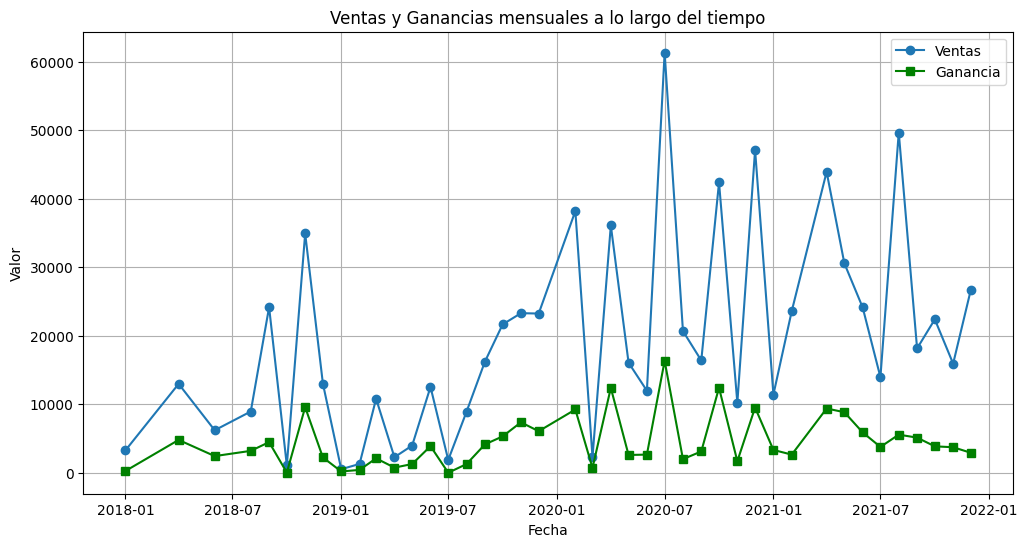

In [11]:


plt.figure(figsize=(12,6))
plt.plot(ventas_mensuales['Fecha'], ventas_mensuales['Ventas'], marker='o', label='Ventas')
plt.plot(ganancias_mensuales['Fecha'], ganancias_mensuales['Ganancia'], marker='s', label='Ganancia', color='green')
plt.title('Ventas y Ganancias mensuales a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


### Paso 3. Análisis temporal de ventas y ganancias

La gráfica de líneas presentada permite observar cómo se han comportado las ventas y las ganancias mes a mes a lo largo del periodo 2018–2021. Se evidencia un comportamiento estacional, ya que en varios años las ventas tienden a aumentar en ciertos momentos específicos del año, especialmente hacia los meses de mayo a julio y nuevamente en los últimos meses del año, como noviembre y diciembre. Esto sugiere que en Colombia podrían estar influyendo eventos comerciales o institucionales que impulsan la demanda en esos periodos, como promociones de mitad de año, actividades escolares o temporada navideña.

En contraste, los primeros meses de cada año (enero y febrero) tienden a tener una menor actividad comercial, lo que es coherente con la dinámica post-navideña y de cierre de año fiscal.

En cuanto a las ganancias, se observa que aunque en general siguen una tendencia parecida a las ventas, no siempre crecen en la misma proporción. En algunos meses, especialmente en los picos de venta más altos, la ganancia no crece de forma equivalente, lo que podría indicar la presencia de descuentos, promociones o productos con márgenes de ganancia más bajos. También hay meses con ventas moderadas pero ganancias muy reducidas, lo que sugiere que en esos periodos se vendieron productos menos rentables o con costos asociados más altos.

En resumen, los datos muestran patrones temporales claros tanto en ventas como en ganancias, lo cual puede ser útil para la planificación de campañas de marketing, inventario y estrategias de precios según la época del año.


In [13]:
ventas_envio = df_colombia.groupby('Método de envío')['Ventas'].sum().sort_values(ascending=False)


<ipython-input-14-b38101bbb65c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_envio.values, y=ventas_envio.index, palette='Blues_d')


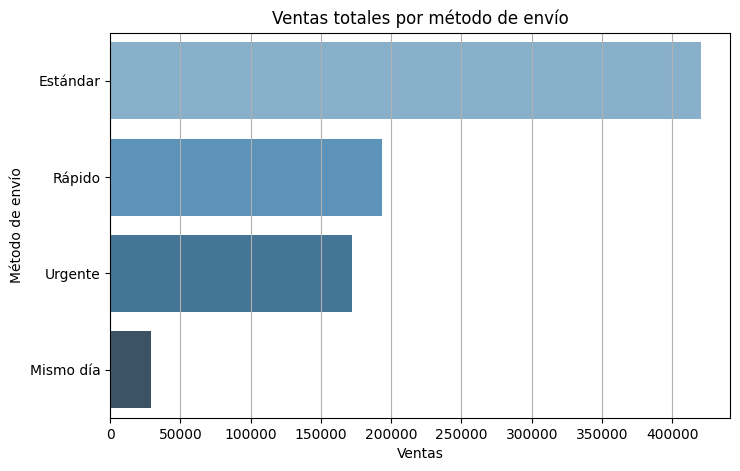

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=ventas_envio.values, y=ventas_envio.index, palette='Blues_d')
plt.title('Ventas totales por método de envío')
plt.xlabel('Ventas')
plt.ylabel('Método de envío')
plt.grid(axis='x')
plt.show()


### Paso 4. Análisis del método de envío

La mayoría de las ventas se hicieron usando el **envío estándar**, lo que indica que es el más elegido por los clientes, probablemente por ser económico y suficientemente rápido. Le siguen los métodos **rápido** y **urgente**, con menos participación.

El método **"mismo día"** casi no se usa, lo que podría deberse a su alto costo o poca necesidad de urgencia en los productos. Esto también puede ser una oportunidad para la empresa si decide impulsar ese tipo de servicio.

En general, los datos muestran que los clientes prefieren opciones más balanceadas entre precio y tiempo.


In [15]:
#Agrupar y sumar ventas por segmento
ventas_segmento = df_colombia.groupby('Segmento')['Ventas'].sum().sort_values(ascending=False)


<ipython-input-19-3e80a08e6d3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_segmento.index, y=ventas_segmento.values, palette='pastel')


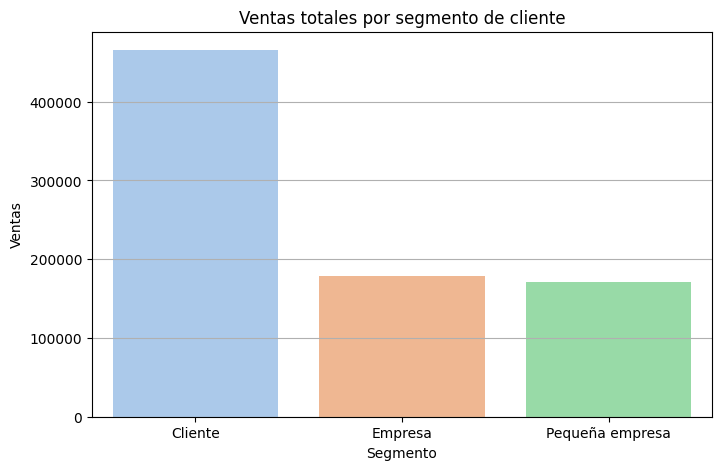

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=ventas_segmento.index, y=ventas_segmento.values, palette='pastel')
plt.title('Ventas totales por segmento de cliente')
plt.xlabel('Segmento')
plt.ylabel('Ventas')
plt.grid(axis='y')
plt.show()


### Paso 5. Análisis por segmento de cliente

La gráfica muestra que el segmento **"Cliente"** es el que más ventas genera, muy por encima de **"Empresa"** y **"Pequeña empresa"**. Esto indica que la mayoría de las compras vienen de personas naturales o consumidores individuales.

Aunque los segmentos empresariales también participan, su impacto es menor. Esto sugiere que el área de marketing debería enfocarse más en estrategias dirigidas al cliente final, como promociones personalizadas o programas de fidelización. También podrían explorar formas de aumentar las ventas a empresas, por ejemplo con descuentos por volumen o alianzas con pequeñas empresas.


<ipython-input-22-053f5af44f51>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_dep.head(10).values, y=ventas_dep.head(10).index, palette='Blues_d')


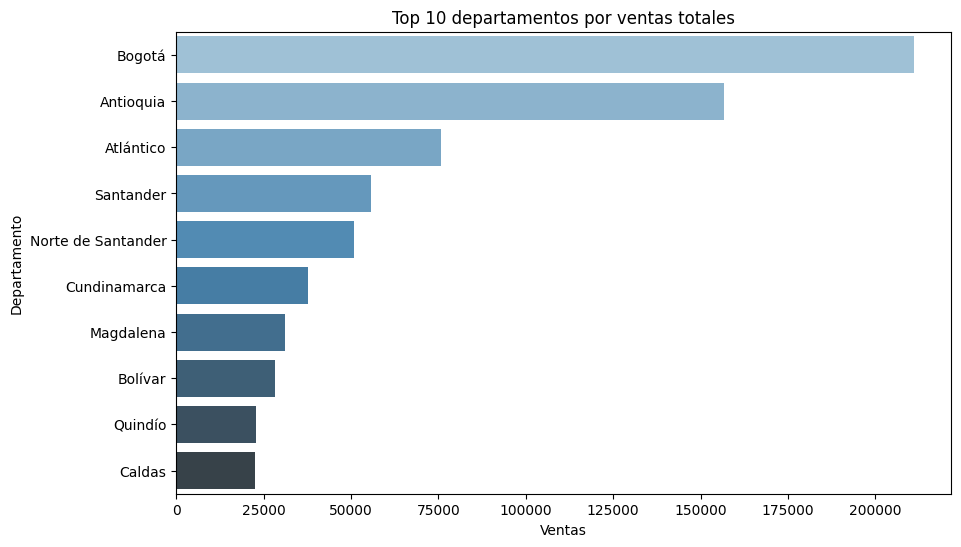

<ipython-input-22-053f5af44f51>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ganancias_dep.head(10).values, y=ganancias_dep.head(10).index, palette='Greens_d')


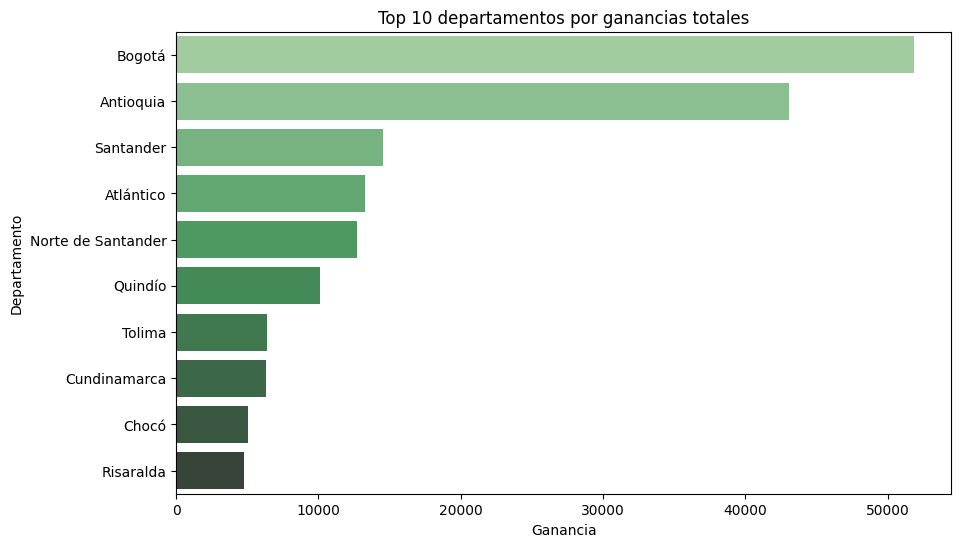

In [22]:
#Otro análisis

# Agrupar ventas y ganancias por departamento
ventas_dep = df_colombia.groupby('Provincia/Estado/Departamento')['Ventas'].sum().sort_values(ascending=False)
ganancias_dep = df_colombia.groupby('Provincia/Estado/Departamento')['Ganancia'].sum().sort_values(ascending=False)

# Gráfica: Ventas por departamento (top 10)
plt.figure(figsize=(10,6))
sns.barplot(x=ventas_dep.head(10).values, y=ventas_dep.head(10).index, palette='Blues_d')
plt.title('Top 10 departamentos por ventas totales')
plt.xlabel('Ventas')
plt.ylabel('Departamento')
plt.show()

# Gráfica: Ganancias por departamento (top 10)
plt.figure(figsize=(10,6))
sns.barplot(x=ganancias_dep.head(10).values, y=ganancias_dep.head(10).index, palette='Greens_d')
plt.title('Top 10 departamentos por ganancias totales')
plt.xlabel('Ganancia')
plt.ylabel('Departamento')
plt.show()


### Análisis  Ventas y ganancias por departamento

Como análisis adicional se exploró qué departamentos de Colombia generan más ventas y ganancias. Los resultados muestran que **Bogotá** y **Antioquia** lideran ampliamente en ambas métricas, lo cual es coherente con su rol como principales centros económicos del país.

Otros departamentos como **Atlántico**, **Santander** y **Norte de Santander** también se destacan, aunque con cifras más moderadas. Esto sugiere que los esfuerzos comerciales y logísticos de la empresa podrían enfocarse en seguir fortaleciendo su presencia en estas zonas, sin dejar de lado oportunidades de crecimiento en regiones que muestran buenos niveles de ganancia, como **Quindío** y **Tolima**.


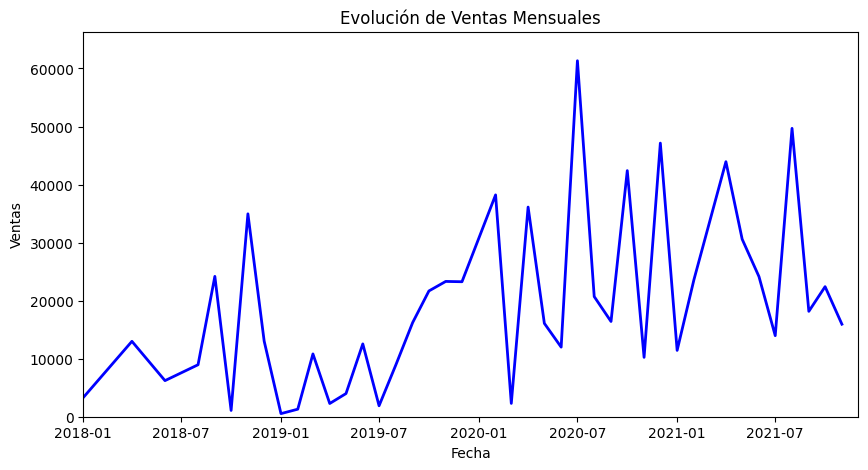

In [20]:
#Animación

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Datos base
data = ventas_mensuales.sort_values('Fecha')  # Asegúrate que está ordenado
fechas = data['Fecha']
valores = data['Ventas']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10,5))
linea, = ax.plot([], [], lw=2, color='blue')
ax.set_xlim(fechas.min(), fechas.max())
ax.set_ylim(0, valores.max() + 5000)
ax.set_title('Evolución de Ventas Mensuales')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas')

# Función que actualiza la gráfica en cada cuadro
def actualizar(frame):
    linea.set_data(fechas[:frame], valores[:frame])
    return linea,

# Crear animación
ani = animation.FuncAnimation(fig, actualizar, frames=len(fechas), interval=200, blit=True)

# Mostrar animación en notebook
HTML(ani.to_jshtml())


Esta animación muestra la evolución mensual de las ventas en Colombia desde 2018 hasta 2021. Se observan picos importantes en mitad y final de año, lo que refuerza el patrón estacional ya identificado en el análisis anterior.